In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import root_scalar
from scipy.stats import siegelslopes
import punct_utils as utils

plt.style.use('default')
plt.rcParams["text.usetex"] = True
np.random.seed(14159)

We study the phase transition position when $L \times p$ is constant.

In [2]:
n = 10000
c_r = np.arange(1, 200+1)/100
p_r = np.round(c_r*n).astype(int)

mem_size = p_r[-1]*10 # Memory size (L*p)

In [3]:
def get_pht(mem):
    L_r = np.round(mem/(c_r*n)).astype(int)
    eps_r = (2*L_r-1)/n
    pht_c = np.zeros(c_r.size)
    k_nu = 2*np.pi*np.arange(n)/n
    a, b = 1e-5, 50
    for i, (p, L) in enumerate(zip(p_r, L_r)):
        psi = utils.nu(L, k_nu)
        func_c = lambda t: p*np.mean((psi/((t+1)*psi[0]-psi))**2)-1
        if func_c(a)*func_c(b) < 0:
            res_c = root_scalar(func_c, method='brentq', bracket=[a, b])
            pht_c[i] = res_c.root if res_c.converged else np.nan
        else:
            pht_c[i] = np.nan
    return pht_c, L_r, eps_r

In [4]:
pht_c, L_r, eps_r = get_pht(mem_size)

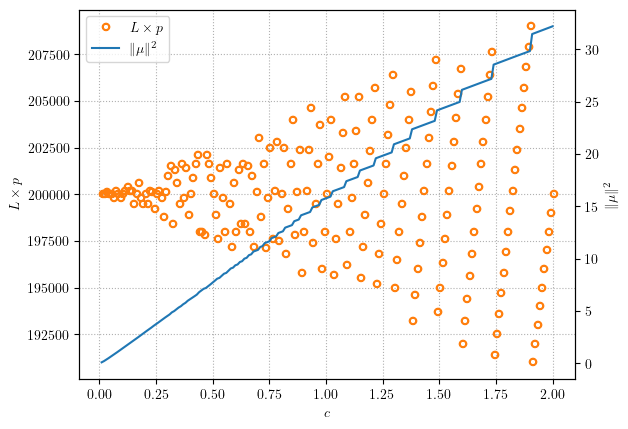

In [5]:
plt.plot(c_r, (L_r*p_r), ls='', marker='$\circ$', color='C1', label="$L \\times p$")
plt.grid(ls=':')
plt.xlabel("$c$")
plt.ylabel("$L \\times p$")
ax1 = plt.gca()
ax2 = plt.twinx()
plt.plot(c_r, pht_c, color='C0', label="$\\| \\mu \\|^2$")
plt.ylabel("$\\| \\mu \\|^2$")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1+lines2, labels1+labels2)
plt.show()

In [6]:
mask = (~np.isnan(pht_c))
slope, intercept = siegelslopes(pht_c[mask], x=c_r[mask])
print("Estimated slope:\t{}\nEstimated intercept:\t{}".format(slope, intercept))

Estimated slope:	16.053701904152256
Estimated intercept:	-0.25913824445401


In [7]:
mem_r = np.linspace(p_r[-1], p_r[-1]*100, 100).astype(int)
slope_r, intercept_r = np.zeros(100), np.zeros(100)
for i, mem in enumerate(tqdm(mem_r)):
    pht_c, _, _ = get_pht(mem)
    mask = (~np.isnan(pht_c))
    slope_r[i], intercept_r[i] = siegelslopes(pht_c[mask], x=c_r[mask])

100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


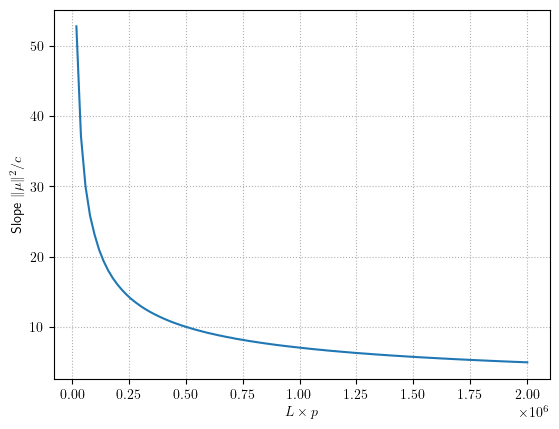

In [8]:
plt.plot(mem_r, slope_r)
plt.grid(ls=':')
plt.xlabel("$L \\times p$")
plt.ylabel("Slope $\\| \\mu \\|^2 / c$")
plt.show()